In [ ]:
#default_exp csf

# csf
> Documentation for the Circular Separability Filter

In [ ]:
#export 
from circle_finder.core import *
import numpy as np
from skimage.feature import peak_local_max

In [ ]:
#export

class CircularSeparabilityFilter:
    def __init__(self, r_in, r_out):
        self.r_in = r_in
        self.r_out = r_out
        
    def __call__(self, img):
        return seperability_filter(img, (self.r_in, self.r_in), (self.r_out, self.r_out), angle=0)
    
    def find_circles(self, img, num_circles=None):
        sepmap = seperability_filter(img, (self.r_in, self.r_in), (self.r_out, self.r_out), angle=0)
        sepmap[np.isnan(sepmap)]=0
        peaks = peak_local_max(sepmap)
        
        if num_circles is None:
            return peaks
        else:
            return peaks[:num_circles] 
            

100%|██████████| 43/43 [00:00<00:00, 43.58it/s]


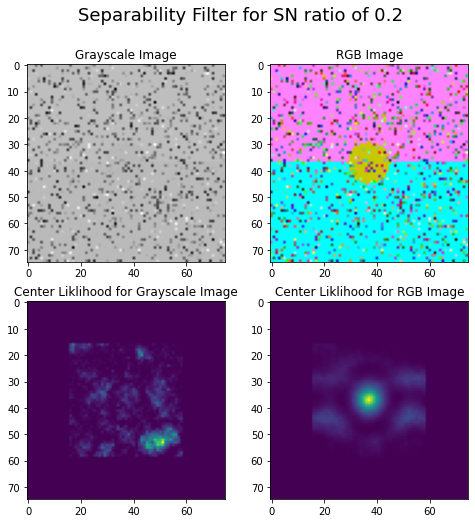

In [ ]:
#example
import cv2 as cv
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

r_in, r_out = 8, 16
csf = CircularSeparabilityFilter(r_in, r_out)

size = 75
dummy_im = np.zeros((size, size, 3), np.uint8)
dummy_im[:size//2] = (255,130,255)
dummy_im[size//2:] = (255,255,0)

cv.circle(dummy_im, (size//2, size//2), 8, (0,200,200), thickness=-1)
density = 0.2

noise = np.ceil(scipy.sparse.rand(size, size, density).todense()).astype(np.uint8)
dummy_im +=  np.random.randint(0, 255, size=(size,size,3), dtype=np.uint8) * np.expand_dims(noise, axis=-1)

gray = cv.cvtColor(dummy_im, cv.COLOR_BGR2GRAY)
rgb = cv.cvtColor(dummy_im, cv.COLOR_BGR2RGB)

fig, axs = plt.subplots(2,2, figsize=(8,8))

axs[0,0].imshow(gray, cmap='gray')
axs[0,0].set_title('Grayscale Image')

axs[0,1].imshow(rgb)
axs[0,1].set_title('RGB Image')

res = csf(gray)
axs[1,0].imshow(res)
axs[1,0].set_title('Center Liklihood for Grayscale Image')

res = csf(rgb)
axs[1,1].imshow(res)
axs[1,1].set_title('Center Liklihood for RGB Image')

fig.suptitle(f'Separability Filter for SN ratio of {density}', fontsize=18)
plt.show()